# **Kieran Daly Lowe Interview**
---

## Imports

In [11]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv
import os

## Step 3: Getting requests for three data series
---

In [19]:
path_to_dotenv = find_dotenv() 
load_dotenv(path_to_dotenv) 
apikey = os.environ.get("Name_of_api_key_env_variable", None)
api_key = apikey
start_date = '2000-01-01'
end_date = '2020-12-31'
freq = 'q'

I manually set the series_id three times, but it would have been easier to make a list with all three and pass it to a function like:
```python
lst = ['PAYEMS', 'GDPC1', 'CPIAUCSL']
def pull_request(series_id, start_date, end_date, freq):
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

    response = requests.get(url)

    response = response.json()

    df_return = pd.DataFrame(response['observations'])
    
    return df_return
    
for item in lst:
    pull_request(item, start_date, end_date, freq)

    
```

In [20]:
series_id = 'PAYEMS'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

response = requests.get(url)

response = response.json()

df_payems = pd.DataFrame(response['observations'])

#print(len(df_payems))

##
series_id = 'GDPC1'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

response = requests.get(url)

response = response.json()

df_gdp = pd.DataFrame(response['observations'])

#print(len(df_gdp))

##
series_id = 'CPIAUCSL'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

response = requests.get(url)

response = response.json()

df_cpi = pd.DataFrame(response['observations'])

df_cpi = df_cpi[['date', 'value']]
df_cpi = df_cpi.rename({'value': 'CPIAUCSL'}, axis = 1)


df_gdp = df_gdp[['date', 'value']]
df_gdp = df_gdp.rename({'value': 'GDPC1'}, axis = 1)

df_payems = df_payems[['date', 'value']]
df_payems = df_payems.rename({'value': 'PAYEMS'}, axis = 1)

## Step 4: *Merging three series into one df*  
In this step, I used pd.merge to left join all three series on date. FRED also gives everything in an object dtype, so I converted the series to floats and the date column to a date. If I overlooked this step, the plots would have looked very weird.

In [22]:
df = pd.merge(pd.merge(df_cpi,df_gdp,on='date'),df_payems,on='date')
df.CPIAUCSL = df.CPIAUCSL.astype('float')
df.GDPC1 = df.GDPC1.astype('float')
df.PAYEMS = df.PAYEMS.astype('float')
df.date = pd.to_datetime(df.date)
print(df.tail())

         date  CPIAUCSL      GDPC1    PAYEMS
79 2019-10-01   257.860  19202.310  151734.0
80 2020-01-01   258.500  18951.992  151866.0
81 2020-04-01   256.472  17258.205  133665.0
82 2020-07-01   259.421  18560.774  140860.0
83 2020-10-01   260.983  18767.778  142619.0


## Step 5: *Saving df to csv*
---


In [152]:
df.to_csv('cpi_gdp_payems_data')

## Step 6: *Plotting three series on one plot*

## Three Line Plot

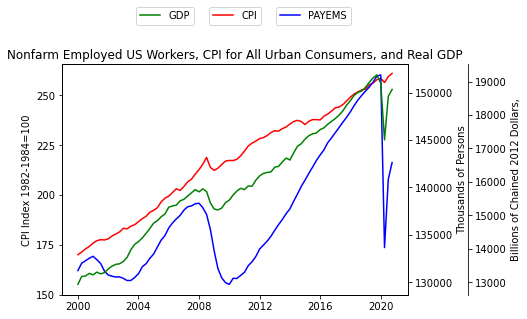

In [17]:
fig = plt.figure()
plt.subplots_adjust(right=0.75)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
twin = ax.twinx()
twin1 = ax.twinx()
ax.plot(df['date'], df['CPIAUCSL'], label = 'CPI', c='r')
ax.set_ylabel('CPI Index 1982-1984=100')
twin1.plot(df['date'], df['GDPC1'], label = 'GDP', c = 'g')
twin1.set_ylabel('Billions of Chained 2012 Dollars,')
twin.plot(df['date'], df["PAYEMS"], label = 'PAYEMS', c = 'b')
twin.set_ylabel('Thousands of Persons')
twin1.spines['right'].set_position(('outward', 60))
ax.set_yticks([150, 175, 200, 225, 250])

#plt.legend()
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
twin.legend(loc = "lower right", bbox_to_anchor=(.85, 1.15), ncol=2)
twin1.legend(loc = "lower left", bbox_to_anchor=(.20, 1.15), ncol=2)
plt.title('Nonfarm Employed US Workers, CPI for All Urban Consumers, and Real GDP')
plt.show()

## Step 7: *Plotting two series in a scatter plot*

## Scatter Plot

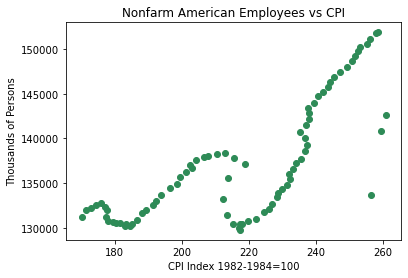

In [7]:
plt.scatter(df['CPIAUCSL'], df['PAYEMS'], c = 'seagreen')
plt.title('Nonfarm American Employees vs CPI')
plt.ylabel('Thousands of Persons')
plt.xlabel('CPI Index 1982-1984=100')
plt.show()

## Step 8: *Histogram of one series*

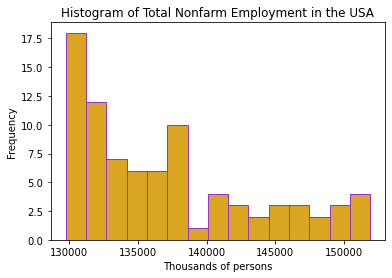

In [8]:
plt.hist(df['PAYEMS'], bins = 15, color = 'goldenrod', edgecolor='darkorchid')
plt.title('Histogram of Total Nonfarm Employment in the USA')
plt.xlabel('Thousands of persons')
plt.ylabel('Frequency')
plt.show()

## Step 10 & 11: *Pulling Two New Series and Plotting Them*

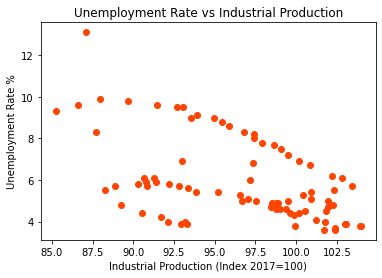

In [9]:
##
series_id = 'UNRATE'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

response = requests.get(url)

response = response.json()

df_unemp = pd.DataFrame(response['observations'])

##
series_id = 'INDPRO'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&frequency={freq}&file_type=json'

response = requests.get(url)

response = response.json()

df_prod = pd.DataFrame(response['observations'])

#print(df_prod.head())

df_prod.value = df_prod.value.astype('float')
df_unemp.value = df_unemp.value.astype('float')

plt.scatter(df_prod['value'], df_unemp['value'], c='orangered')
plt.title('Unemployment Rate vs Industrial Production')
plt.xlabel('Industrial Production (Index 2017=100)')
plt.ylabel('Unemployment Rate %')
plt.show()